In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")
from src.preprocessing import complete_preprocessing
import seaborn as sns
from tueplots import bundles

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# turn list of snake case strings into upper case text with spaces (Special cases of GDP, AI, and ML are handeled as well)
def parse_labels(labels):
    parsed_labels = []

    for label in labels:
        parsed = "\n".join([word.capitalize() for word in label.split('_')]).replace('Gdp', 'GDP').replace('Usd', 'USD').replace('Ai\nOr\nMl', 'AI or ML')
        parsed_labels.append(parsed)

    return parsed_labels

/Users/manuelarns/Developer/Data-Litaracy-Project/exp/src/preprocessing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['gdp_per_capita'] = (gdp_data['gdp_md_est'] / gdp_data['pop_est'] * 1000000)


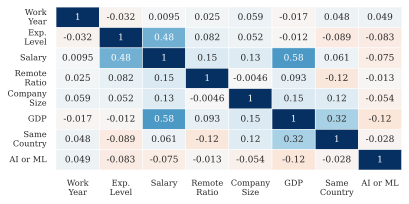

In [25]:
# load data and calculate correlation coefficients using spearman
salaries = complete_preprocessing()
salaries.drop(['salary', 'gdp_company_location'], axis=1, inplace=True)
correlation_coefficients = salaries.corr(method='spearman')


# parse tick labels
labels = parse_labels(correlation_coefficients.columns)
labels = ['Work\nYear', 'Exp.\nLevel', 'Salary', 'Remote\nRatio', 'Company\nSize', 'GDP', 'Same\nCountry', 'AI or ML']

# plot using seaborn
sns.set(rc = {'figure.figsize':(6.2,3)})
sns.set(font_scale=.75)
matplotlib.rcParams['font.family'] = 'Serif'
#plt.yticks(np.arange(7)+10, ha='center')
heatmap = sns.heatmap(correlation_coefficients,
                      annot=True,
                      cmap='RdBu',
                      cbar=False,
                      vmin=-1,
                      vmax=1,
                      linewidths=.5,
                      xticklabels=labels,
                      yticklabels=labels)


matplotlib.pyplot.savefig('../doc/fig/correlation.pdf', bbox_inches='tight')